# Innovative AI Challenge 2024

<img src="https://github.com/Sakib-Dalal/Crop_Recommendation_AI_App/blob/main/app/client/public/images/Logo.jpg?raw=true" />

#### Project By Sakib Dalal
- GitHub Project repo: <a href="www.github.com">Link</a>
#### problem statement: 
- AI in Agriculture: Develop AI models to enhance intensive agricultural practices and address the future global food crisis.

#### Agriculture Productivity Prediction
- **Objective**: Build an AI/ML model that predicts agricultural productivity based on crop type, weather conditions, soil properties, and other relevant factors.
- **Requirements**:
    - Ensure the model is accurate and farmer-friendly.
    - Provide a simple, accessible user interface for farmers to use effectively. Create an interface or a small website to showcase your AI/ML model.
    - Problem analysis, solution overview, methodology, and implementation steps. Short video, codes via challenge website.
- **Scoring**:
    - Submissions will be evaluated based on *Mean Squared Error*.

### Challenge Overview

#### Files
- **train.csv** - The training dataset, which includes the features and target variable (crop_yield in kg/ha).
- **test.csv** - The test dataset, which you will use to generate predictions and submit your solutions.
- **sample_submission.csv** - A sample submission file that shows the correct format for submitting your predictions.
#### Columns
- `id' - A unique identifier for each data point (e.g., 1, 2, 3,…).
- 'Year' - The year of the production (e.g., 2020, 2002).
- 'State' - The state where the data is collected (e.g., Punjab).
- 'Crop_Type' - The type of crop grown (e.g., Rice, Wheat, Bajra).
- 'Rainfall' - The amount of annual average state rainfall in mm (e.g., 1200 mm).
- 'Soil_Type' - The type of soil in the region (e.g., Loamy).
- 'Irrigation_Area' - Area of irrigated land in Thousand hectare
- 'Crop_Yield' - The target variable representing the crop yield in kg/ha.
#### Notes:
- Data Format: The data is provided in CSV format. Ensure that all files are read correctly and that you handle any missing data appropriately.
- Feature Engineering: While the data is provided in a raw form, you may perform feature engineering and transformations to enhance your model.
- Prediction Goal: Your model should predict agricultural productivity based on the features in the data (for the agriculture problem statement).

<img src="https://images.javatpoint.com/tutorial/machine-learning/images/machine-learning-life-cycle.png" />

# Index

- **Step 1**: Loading Dataset
    - The dataset is provided by the Innovative AI Challenge 2024
    - Link for data set on kaggle: <a href="https://www.kaggle.com/competitions/innovative-ai-challenge-2024/data">dataset</a>
- **Step 2**: Data Preparation
    - We will prepare our data in this step.
    - The dataset is provided into *csv* format.
    - using **polars** we will convert into dataframe.
- **Step 3**: Data Wrangling
    - Look for any **null** values in dataset.
    - Feature Engineering.
- **Step 4**: Analyse Data
    - In this step we will *Analyse* and *Visualise* our data.
    - Here we will select important features to train our *ML* model.
- **Step 5**: Training Model
    - We will use diffent *ML* model's for our *regression problem*.
    - Based on the evaluation we will select a model for testing.
- **Step 6**: Testing Model
    - It it the phase where we will finalize and predict the test data.
- **Step 7**: Deployment
    - predicting the test dataset and converting to csv 
    - Saving best performing model so that we can use in our **Web App**.

# Step 1: Importing Data
- We will import the dataset from kaggle
- The dataset is in csv format.
- here are the links for dataset:
    - train.csv: "/kaggle/input/innovative-ai-challenge-2024/train.csv"
    - test.csv: "/kaggle/input/innovative-ai-challenge-2024/test.csv"
    - sample_submission.csv: "/kaggle/input/innovative-ai-challenge-2024/sample_submission.csv"

In [1]:
TRAIN_URL = "/kaggle/input/innovative-ai-challenge-2024/train.csv"
TEST_URL = "/kaggle/input/innovative-ai-challenge-2024/test.csv"
SUBMISSION_URL = "/kaggle/input/innovative-ai-challenge-2024/sample_submission.csv"

# Step 2: Data Preparation
- We will be using <a href="https://pandas.pydata.org/pandas-docs/stable/index.html">Pandas</a> to convert our dataset from *csv* to *dataframes*.
- **Note**: For future proof project better use **Polars** for data processing.
- We will use **read_csv** method from Pandas to read the csv file and convert into dataframe.

In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv(TRAIN_URL)
test_df = pd.read_csv(TEST_URL)

submission_df = pd.read_csv(SUBMISSION_URL)

- Let's view the first five items in our dataset's

In [4]:
train_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,3,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,4,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,5,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304


In [5]:
test_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area
0,1001,2021,Punjab,Wheat,556.9,Loamy,3500.7
1,1002,2020,Punjab,Wheat,602.6,Loamy,3509.5
2,1003,2019,Punjab,Rice,578.6,alluvial,3091.8
3,1004,2018,Punjab,Rice,598.3,alluvial,3057.9
4,1005,2017,Punjab,Rice,493.0,alluvial,3033.0


In [6]:
submission_df.head()

,id,Target
0,1001,0
1,1002,0
2,1003,0
3,1004,0
4,1005,0


- Let get from training data
    - information
    - number of columns
    - shape and size
    - description

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  55 non-null     int64  
 1   Year                55 non-null     int64  
 2   State               55 non-null     object 
 3   Crop_Type           55 non-null     object 
 4   Rainfall            55 non-null     float64
 5   Soil_Type           55 non-null     object 
 6   Irrigation_Area     55 non-null     float64
 7   Crop_Yield (kg/ha)  55 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.6+ KB


In [8]:
train_df.columns

Index(['id', 'Year', 'State', 'Crop_Type', 'Rainfall', 'Soil_Type',
       'Irrigation_Area', 'Crop_Yield (kg/ha)'],
      dtype='object')

In [9]:
len(train_df.columns)

8

In [10]:
train_df.shape

(55, 8)

- From this we get to now:
    - There are total 8 columns
    - **Crop_Yield (kg/ha)** is the target columns
    - There are 55 rows.

In [11]:
train_df.describe()

,id,Year,Rainfall,Irrigation_Area,Crop_Yield (kg/ha)
count,55.00000,55.000000,55.000000,55.000000,55.000000
mean,28.00000,2009.527273,473.881818,2082.207273,3079.418182
std,16.02082,6.394021,106.836760,1495.190498,1706.608372
min,1.00000,2000.000000,218.900000,1.200000,0.000000
25%,14.50000,2004.000000,391.900000,5.500000,985.500000
50%,28.00000,2009.000000,459.500000,2721.800000,3943.000000
75%,41.50000,2015.000000,561.400000,3393.250000,4305.500000
max,55.00000,2021.000000,662.800000,3515.200000,5188.000000


- let's see unique values and value counts in Year column from `train_df`

In [12]:
train_df["Year"].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 2021, 2020])

In [13]:
train_df["Year"].value_counts()

Year
2015    3
2016    3
2008    3
2007    3
2010    3
2001    3
2000    3
2002    3
2009    3
2006    3
2003    3
2004    3
2005    3
2018    2
2017    2
2019    2
2011    2
2013    2
2014    2
2021    2
2020    2
Name: count, dtype: int64

- Let's see unique values and value count's in State column in train_df

In [14]:
train_df["State"].unique()

array(['Punjab'], dtype=object)

In [15]:
train_df["State"].value_counts()

State
Punjab    55
Name: count, dtype: int64

- Let's see unique values and value count's in Crop Type column in train_df

In [16]:
train_df["Crop_Type"].unique()

array(['Wheat', 'Rice', 'Bajra'], dtype=object)

In [17]:
train_df["Crop_Type"].value_counts()

Crop_Type
Wheat    19
Rice     18
Bajra    18
Name: count, dtype: int64

- Let's see unique values and value count's in Soil_Type column in train_df

In [18]:
train_df["Soil_Type"].unique()

array(['Loamy', 'alluvial'], dtype=object)

In [19]:
train_df["Soil_Type"].value_counts()

Soil_Type
Loamy       37
alluvial    18
Name: count, dtype: int64

# Step 3: Data Wrangling
- In this step we will look for any null values in our *training* dataset.
- For this we will be using **Pandas** library

In [20]:
train_df.isna().sum()

id                    0
Year                  0
State                 0
Crop_Type             0
Rainfall              0
Soil_Type             0
Irrigation_Area       0
Crop_Yield (kg/ha)    0
dtype: int64

- there are no null values given by pandas but there are 0 and less ranged values in **Crop_Yield** target column.

In [21]:
(train_df["Crop_Yield (kg/ha)"] == 0).sum()

2

- There are Two values has 0

In [22]:
(train_df["Crop_Yield (kg/ha)"] <= 100).sum()

3

- and there are 3 rows which are less then 100 including 0 values

In [23]:
train_df

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,3,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,4,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,5,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304
5,6,2014,Punjab,Wheat,384.9,Loamy,3474.7,5017
6,7,2013,Punjab,Wheat,619.7,Loamy,3488.1,4724
7,8,2011,Punjab,Wheat,218.9,Loamy,3466.9,4693
8,9,2010,Punjab,Wheat,472.1,Loamy,3474.8,4307
9,10,2009,Punjab,Wheat,384.9,Loamy,3474.8,4462


- Let's drop the rows with 0 and less than 100 values.
- These values are like anamolies.

In [24]:
train_df = train_df.drop(train_df[train_df["Crop_Yield (kg/ha)"] < 100].index)
# data after cleaning null values
train_df

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,3,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,4,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,5,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304
5,6,2014,Punjab,Wheat,384.9,Loamy,3474.7,5017
6,7,2013,Punjab,Wheat,619.7,Loamy,3488.1,4724
7,8,2011,Punjab,Wheat,218.9,Loamy,3466.9,4693
8,9,2010,Punjab,Wheat,472.1,Loamy,3474.8,4307
9,10,2009,Punjab,Wheat,384.9,Loamy,3474.8,4462


- Hence, there are no *null* values in our training dataset.
- Let's see the datatype of each columns in train_df.

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 54
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  52 non-null     int64  
 1   Year                52 non-null     int64  
 2   State               52 non-null     object 
 3   Crop_Type           52 non-null     object 
 4   Rainfall            52 non-null     float64
 5   Soil_Type           52 non-null     object 
 6   Irrigation_Area     52 non-null     float64
 7   Crop_Yield (kg/ha)  52 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.7+ KB


In [26]:
for k, v in train_df.items():
    print(k,"column has datatype of:", v.dtype)

id column has datatype of: int64
Year column has datatype of: int64
State column has datatype of: object
Crop_Type column has datatype of: object
Rainfall column has datatype of: float64
Soil_Type column has datatype of: object
Irrigation_Area column has datatype of: float64
Crop_Yield (kg/ha) column has datatype of: int64


In [27]:
# print columns with datatype as object
for k, v in train_df.items():
    if v.dtype == "object":
        print(k,"column has datatype of:", v.dtype)

State column has datatype of: object
Crop_Type column has datatype of: object
Soil_Type column has datatype of: object


- There are 3 types of data (float64, int64, object)
- We can train our model on float64, int64 datatype but we get an error when we pass object datatype to our model
- **Solution**: To overcome this problem we can use **Sklearn Preprocessing's** *<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html"> LabelEncoder </a>*.

In [28]:
# Label Encoder to deal with object datatypes
from sklearn.preprocessing import LabelEncoder

- before moving one we create a copy of `train_df` dataframe so we can reuse the original when we needed.

In [29]:
train_cp_df = train_df.copy()
train_cp_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,3,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,4,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,5,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304


In [30]:
label_encoder = LabelEncoder()

# Encoding labels in columns
train_cp_df["State"] = label_encoder.fit_transform(train_cp_df["State"])
train_cp_df["Crop_Type"] = label_encoder.fit_transform(train_cp_df["Crop_Type"])
train_cp_df["Soil_Type"] = label_encoder.fit_transform(train_cp_df["Soil_Type"])

- `train_cp_df` dataset after *LabelEncoding*.

In [31]:
train_cp_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,0,2,578.6,0,3515.2,5188
1,2,2018,0,2,598.3,0,3499.3,5077
2,3,2017,0,2,493.0,0,3467.7,5046
3,4,2016,0,2,426.7,0,3474.6,4583
4,5,2015,0,2,546.9,0,3474.7,4304


In [32]:
for k, v in train_cp_df.items():
    print(k,"column has datatype of:", v.dtype)

id column has datatype of: int64
Year column has datatype of: int64
State column has datatype of: int64
Crop_Type column has datatype of: int64
Rainfall column has datatype of: float64
Soil_Type column has datatype of: int64
Irrigation_Area column has datatype of: float64
Crop_Yield (kg/ha) column has datatype of: int64


In [33]:
# old dataset info
for k, v in train_df.items():
    print(k,"column has datatype of:", v.dtype)

id column has datatype of: int64
Year column has datatype of: int64
State column has datatype of: object
Crop_Type column has datatype of: object
Rainfall column has datatype of: float64
Soil_Type column has datatype of: object
Irrigation_Area column has datatype of: float64
Crop_Yield (kg/ha) column has datatype of: int64


- We have successfuly encoded the object datatypes in out dataset.

### Feature Scaling
- our `train_cp_df` dataset contains features that highly vary in magnitudes, units, and range.
- here is visualization for all the features.
- We will be using matplotlib and seaborn for visualization.

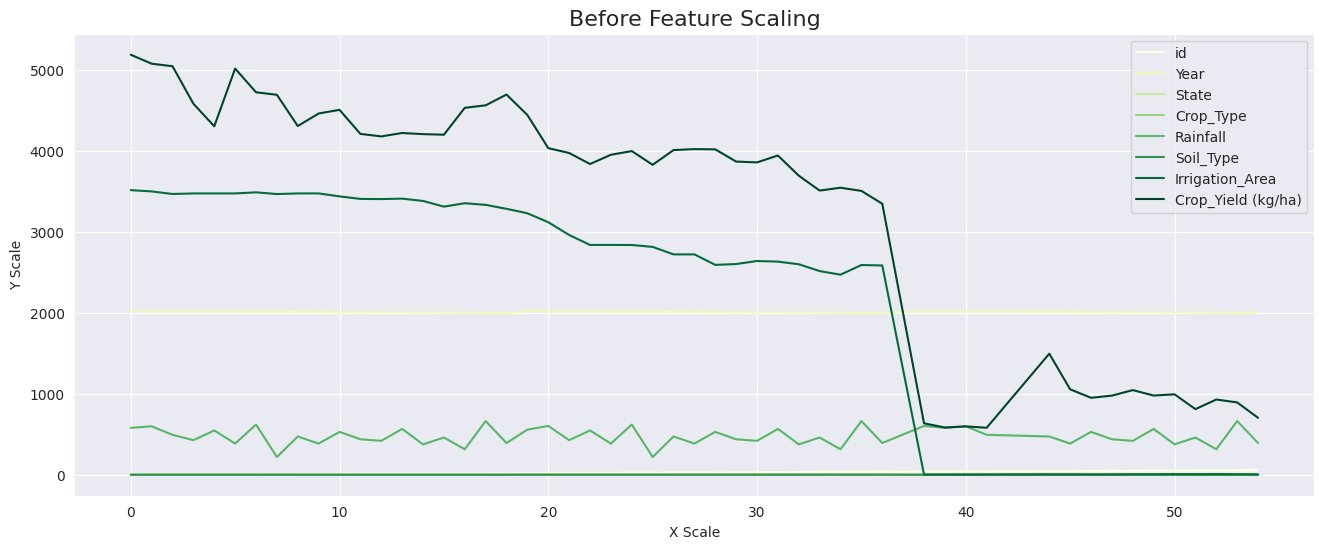

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

train_cp_df.plot(figsize=(16, 6), cmap="YlGn")
plt.title("Before Feature Scaling", fontsize=16)
plt.xlabel("X Scale")
plt.ylabel("Y Scale")

plt.show()

- Here is the histogram view.

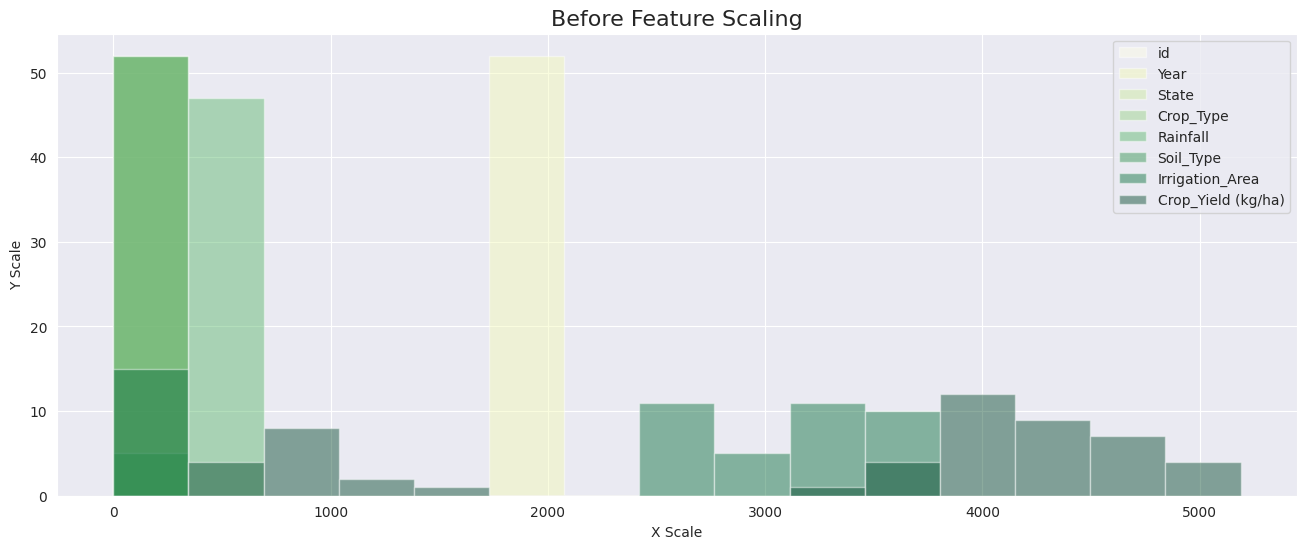

In [35]:
train_cp_df.plot(figsize=(16, 6), cmap="YlGn", kind="hist", alpha=0.45, bins=15)
plt.title("Before Feature Scaling", fontsize=16)
plt.xlabel("X Scale")
plt.ylabel("Y Scale")

plt.show()

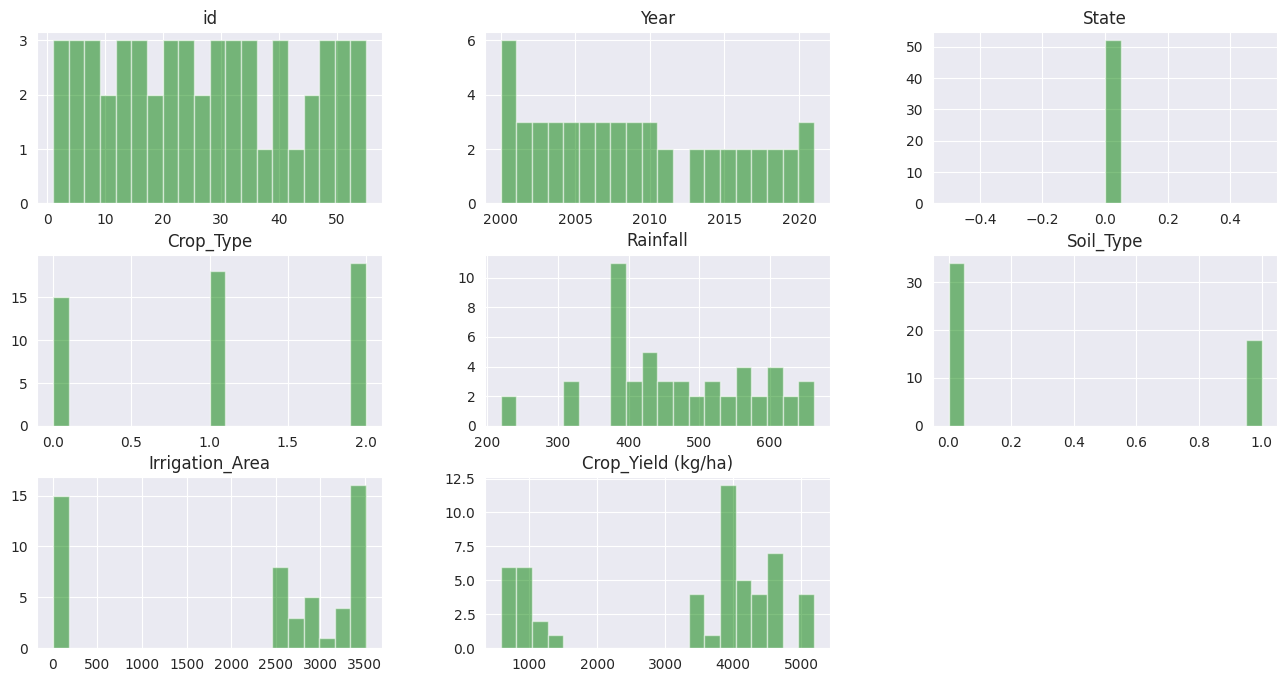

In [36]:
train_cp_df.hist(figsize=(16, 8), bins=20, color=["Green"], alpha=0.5)
plt.show()

- Let's perform feature scaling on out `train_cp_df` dataset.
- We will be using Sklearn's preprocessing method named **<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScaler</a>**
- Formula to perform standard scaling is:<br> $z = (x - u) / s$
- where:
    - z is scaled data
    - x is to be scaled data
    - u is the mean of the training samples
    - s is the standard deviation of the training samples.
- There are also different scaling method provided by sklearn but StandardScaler perform the best.

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

# we will apply feature scaling on train_cp_df dataset
train_cp_df = scaler.fit_transform(train_cp_df)

- after standard scaling our data will be no more in dataframe, it will be converted into numpy arrays.
- we will again use the pandas to convert it into dataframe.

In [39]:
type(train_cp_df)

numpy.ndarray

In [40]:
train_cp_df = pd.DataFrame(data=train_cp_df, columns=train_df.columns)
train_cp_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,-1.642256,1.602577,0.0,1.146764,0.992969,-0.727607,0.915341,1.233896
1,-1.579602,1.441077,0.0,1.146764,1.176110,-0.727607,0.904257,1.162993
2,-1.516948,1.279577,0.0,1.146764,0.197192,-0.727607,0.882227,1.143191
3,-1.454294,1.118077,0.0,1.146764,-0.419163,-0.727607,0.887038,0.847443
4,-1.391640,0.956577,0.0,1.146764,0.698272,-0.727607,0.887107,0.669228


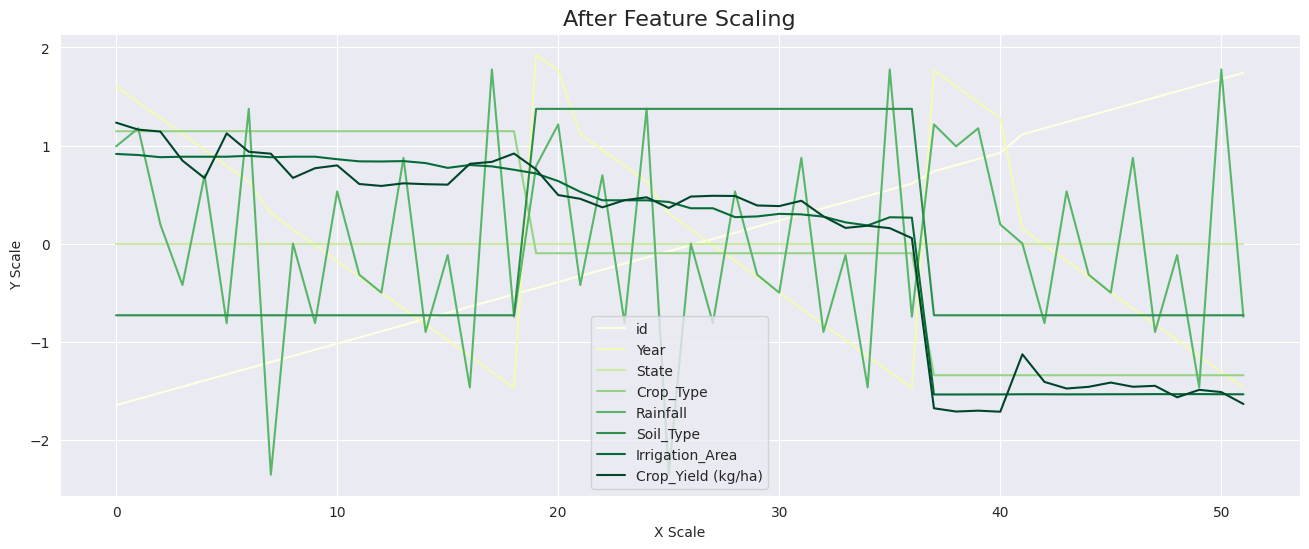

In [41]:
# plot after feature scaling
train_cp_df.plot(figsize=(16, 6), cmap="YlGn")
plt.title("After Feature Scaling", fontsize=16)
plt.xlabel("X Scale")
plt.ylabel("Y Scale")

plt.show()

- Now it's better. Each feature had scaled between 2 to -2.
- here is the histogram view.

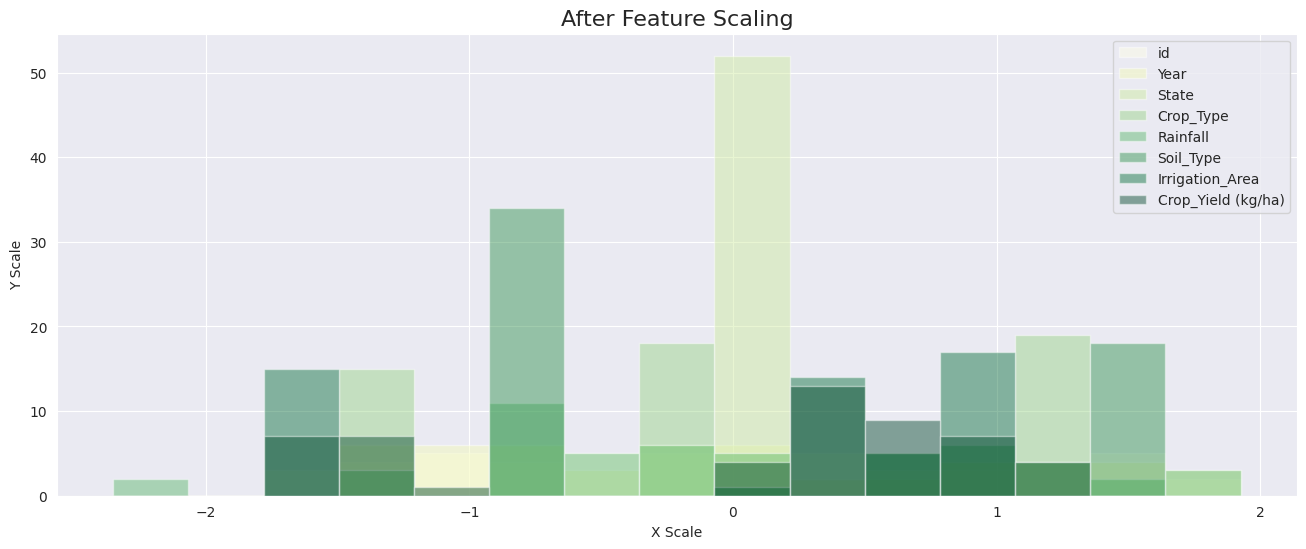

In [42]:
train_cp_df.plot(figsize=(16, 6), cmap="YlGn", kind="hist", alpha=0.45, bins=15)
plt.title("After Feature Scaling", fontsize=16)
plt.xlabel("X Scale")
plt.ylabel("Y Scale")

plt.show()

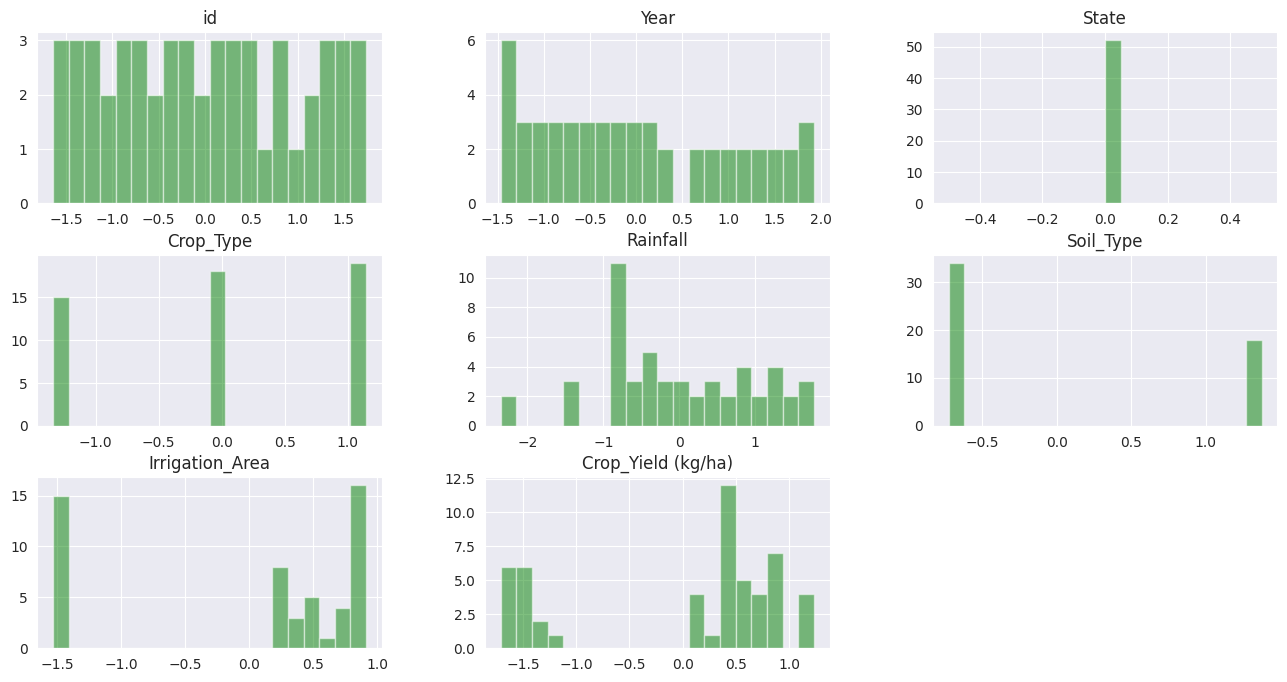

In [43]:
train_cp_df.hist(figsize=(16, 8), bins=20, color="Green", alpha=0.5)
plt.show()

- Now we can easy extract the important features from dataset.

### Extracting Important Features 
- In this step we will select the best features so that our model will perform better.
- In First method of feature extraction we will be using Correlation Matrix
- In Second method of feature extraction we will be using **RandomForest's important features**. 

#### Method 1: Correlation Matrix of training dataset

In [44]:
correlation_matrix = train_cp_df.corr()
correlation_matrix

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
id,1.000000,-0.371634,NaN,-0.944288,-0.022904,0.058738,-0.906527,-0.900113
Year,-0.371634,1.000000,NaN,0.048972,0.293180,0.010546,0.110040,0.119685
State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crop_Type,-0.944288,0.048972,NaN,1.000000,-0.064999,-0.069533,0.936988,0.922778
Rainfall,-0.022904,0.293180,NaN,-0.064999,1.000000,-0.046332,-0.061572,-0.063508
Soil_Type,0.058738,0.010546,NaN,-0.069533,-0.046332,1.000000,0.272507,0.278228
Irrigation_Area,-0.906527,0.110040,NaN,0.936988,-0.061572,0.272507,1.000000,0.988168
Crop_Yield (kg/ha),-0.900113,0.119685,NaN,0.922778,-0.063508,0.278228,0.988168,1.000000


- Corelation Matrix for all (including labels)

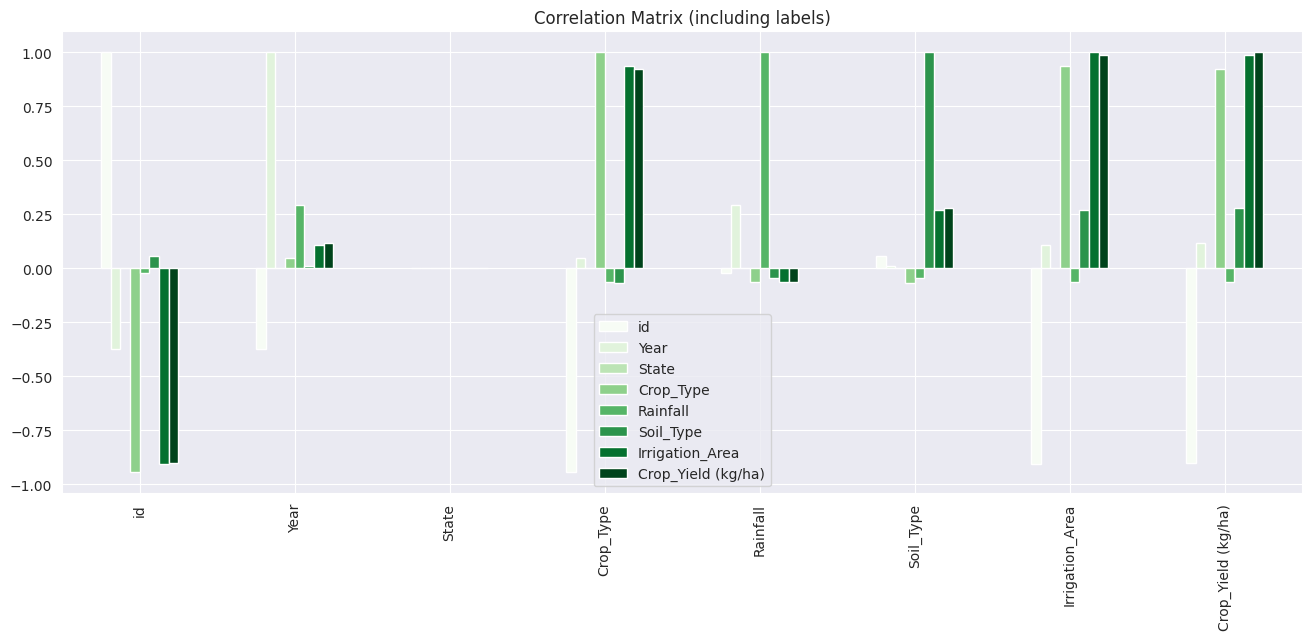

In [45]:
# here is the correlation matrix including all feature's and our labels
correlation_matrix.plot(kind="bar", figsize=(16, 6), cmap="Greens")
plt.title("Correlation Matrix (including labels)")
plt.show()

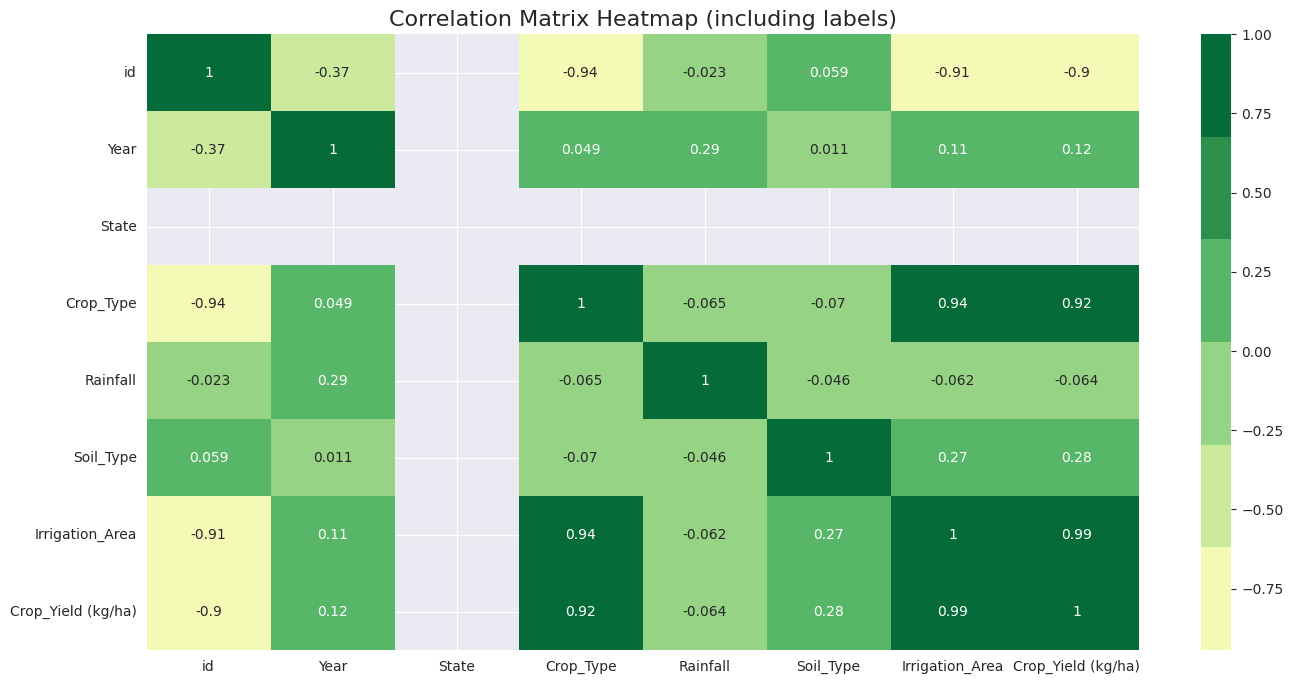

In [46]:
# let's visualize the correlation matrix more better using heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("YlGn"))
plt.title("Correlation Matrix Heatmap (including labels)", fontsize=16)
plt.show();

- Corelation Matrix on the basis of **Crop_Yield (kg/ha)** *(labels)*.

In [47]:
correlation_matrix["Crop_Yield (kg/ha)"].sort_values(ascending=False)

Crop_Yield (kg/ha)    1.000000
Irrigation_Area       0.988168
Crop_Type             0.922778
Soil_Type             0.278228
Year                  0.119685
Rainfall             -0.063508
id                   -0.900113
State                      NaN
Name: Crop_Yield (kg/ha), dtype: float64

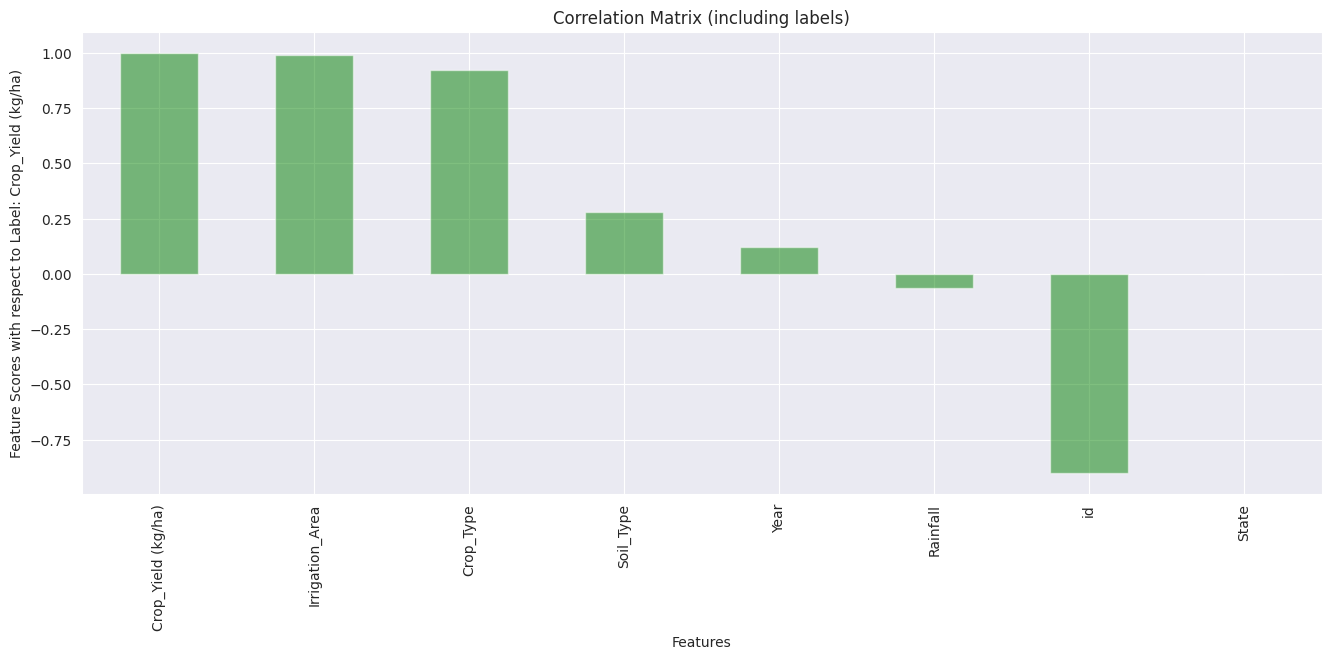

In [48]:
# in visualization form
correlation_matrix["Crop_Yield (kg/ha)"].sort_values(ascending=False).plot(kind="bar", figsize=(16, 6), color="green", alpha=0.5)
plt.title("Correlation Matrix (including labels)")
plt.xlabel("Features")
plt.ylabel("Feature Scores with respect to Label: Crop_Yield (kg/ha)")
plt.show()

- after finding Correlation Matrix for training dataset we can say
    - The **State** Feature doesn't share any feature importance to our target value **Crop_Yield (kg/ha)**.
    - The feature **Irrigation_Area** has 98.4% of correleation with our target value **Crop_Yield (kg/ha)**.
    - The feature **Crop_Type** has 92.2% correlation with our traget value **Crop_Yield (kg/ha)**.
    - The feature **Soil_Type** has 31.9% correlation with our target value **Crop_Yield (kg/ha)**.

#### Method 2: Using Random Forest to find the important features

In [49]:
from sklearn.ensemble import RandomForestRegressor

- Applying random forest on training dataset to find the best features.

In [50]:
# using train_cp_df for feature importance (already scaled features)
train_cp_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,-1.642256,1.602577,0.0,1.146764,0.992969,-0.727607,0.915341,1.233896
1,-1.579602,1.441077,0.0,1.146764,1.176110,-0.727607,0.904257,1.162993
2,-1.516948,1.279577,0.0,1.146764,0.197192,-0.727607,0.882227,1.143191
3,-1.454294,1.118077,0.0,1.146764,-0.419163,-0.727607,0.887038,0.847443
4,-1.391640,0.956577,0.0,1.146764,0.698272,-0.727607,0.887107,0.669228


In [51]:
# split into X and y 
X = train_cp_df.drop("Crop_Yield (kg/ha)", axis=1)
y = train_cp_df["Crop_Yield (kg/ha)"]

# Applying RandomForestRegressor
feature_extract = RandomForestRegressor(n_estimators=1000, random_state=42)
feature_extract.fit(X, y)

RandomForestRegressor(n_estimators=1000, random_state=42)

- Here are some of the best features found using Random Forest Regression method.

In [52]:
feature_extract.feature_importances_

array([0.39309817, 0.00750154, 0.        , 0.2966595 , 0.00210402,
       0.00357048, 0.29706629])

- let's view in more better way.

In [53]:
# Displaying feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': feature_extract.feature_importances_}, index=X.columns)
print(feature_importance[1:].sort_values(by='Importance', ascending=False))

                         Feature  Importance
Irrigation_Area  Irrigation_Area    0.297066
Crop_Type              Crop_Type    0.296659
Year                        Year    0.007502
Soil_Type              Soil_Type    0.003570
Rainfall                Rainfall    0.002104
State                      State    0.000000


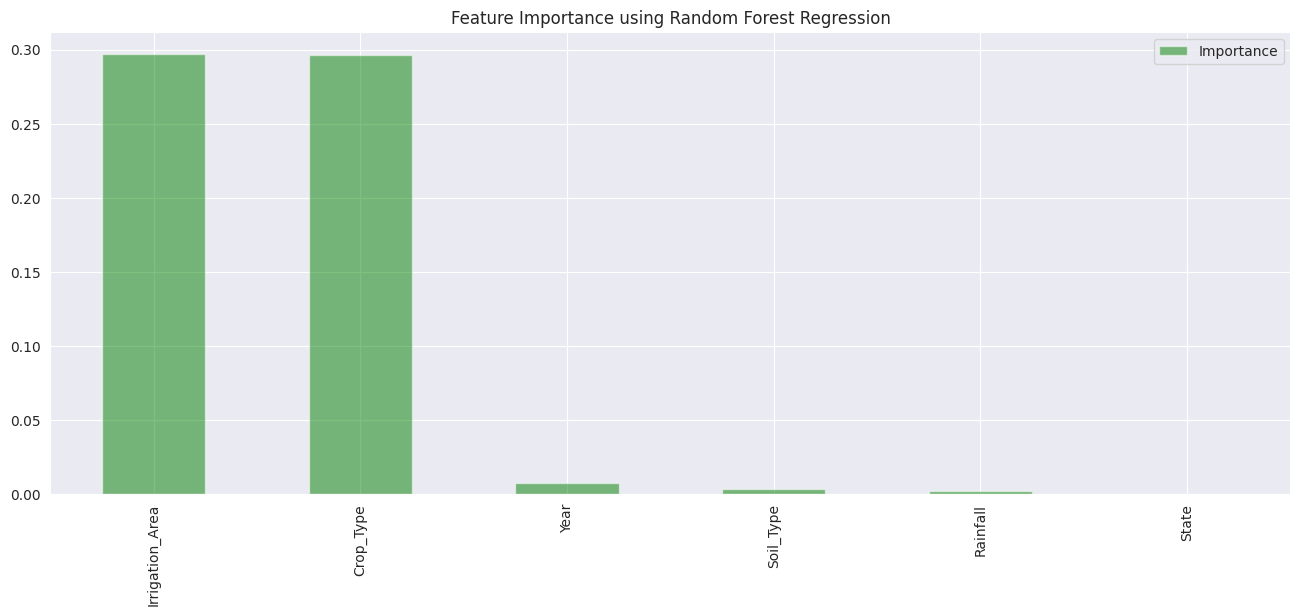

In [54]:
# Bar graph visualization
feature_importance[1:].sort_values(by='Importance', ascending=False).plot(kind="bar", color="green", alpha=0.5, figsize=(16, 6))
plt.title("Feature Importance using Random Forest Regression")
plt.show()

- after finding best feature using random forest regression we know:
    - the feature **Irrigation_Area** shares the highest importance of 31.9%
    - the feature **State** shares the lowest importance of 0%
    - we will cont cosider id feature as it's is not a feature.

### Final Outcome for Feature Importance
- After using both **Correlation Matrix** and **Random Forest Regression**, the best features we got are:
    - **Irrigation_Area**
    - **Crop_Type**
    - **Year**
    - **Rainfall**
    - **Soil_Type**

# Step 4: Analyse Data

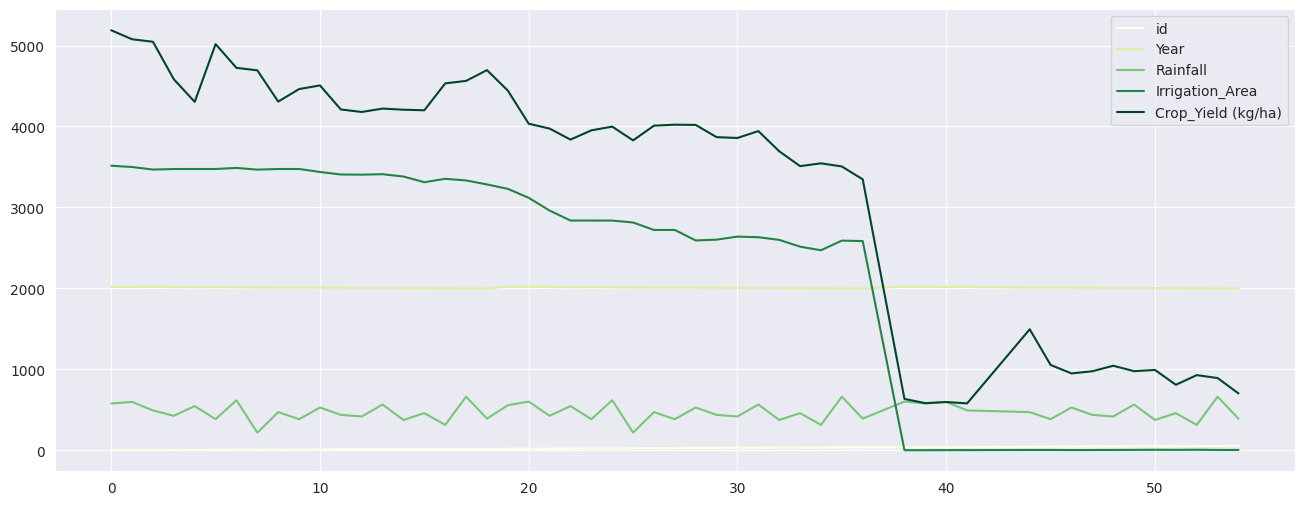

In [55]:
# before processing the training data
train_df.plot(cmap="YlGn", figsize=(16, 6))
plt.show()

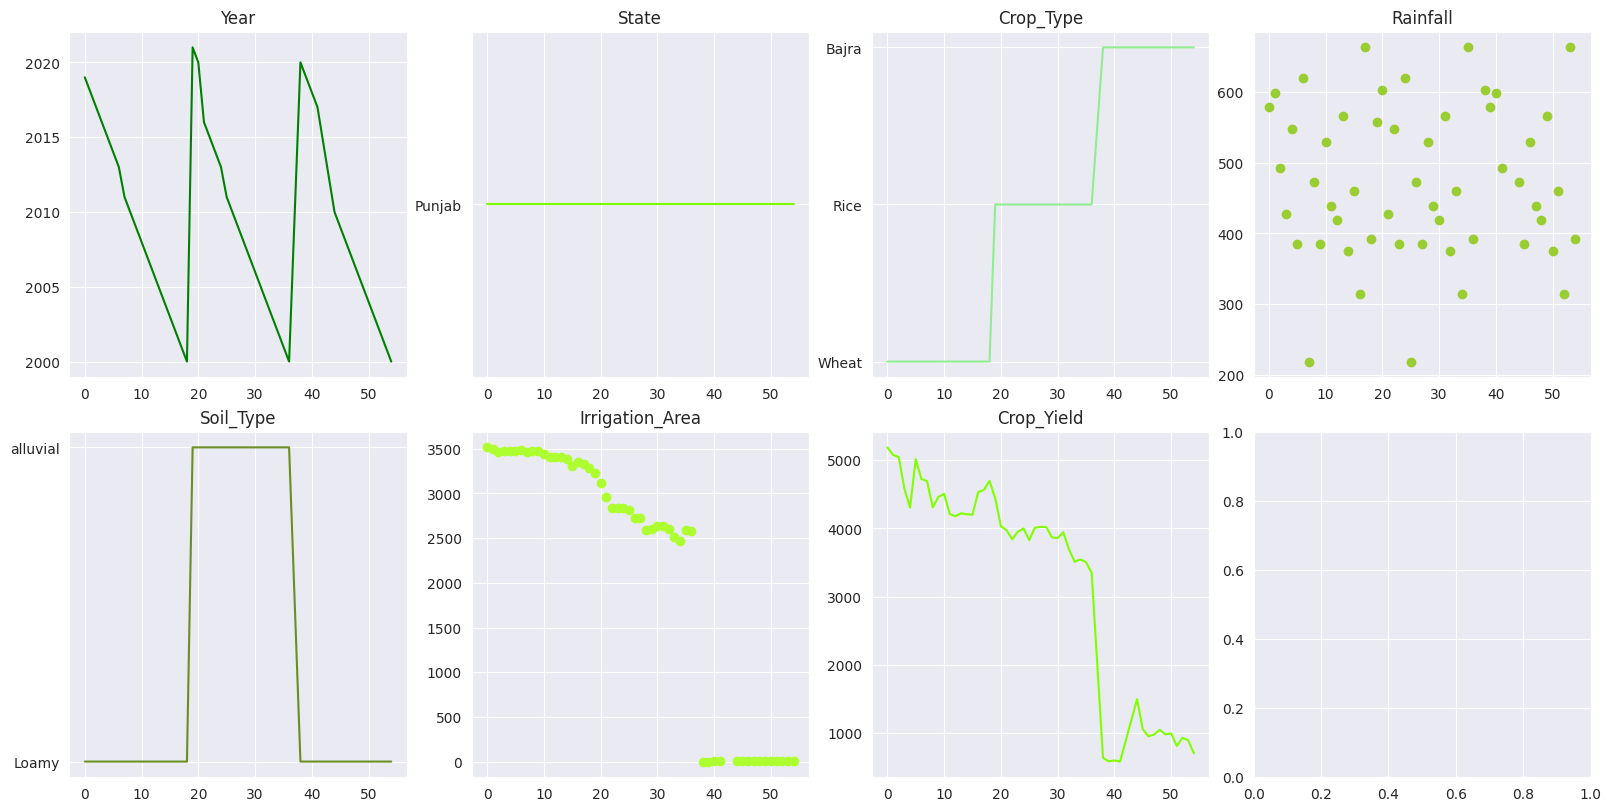

In [56]:
# before processing the training data
fig, axs = plt.subplots(2, 4, layout="constrained", figsize=(16, 8))

ax = axs[0][0]
ax.plot(train_df.index, train_df["Year"], color="g")
ax.set_title("Year")

ax = axs[0, 1]
ax.plot(train_df["State"], color="lawngreen")
ax.set_title("State")

ax = axs[0, 2]
ax.plot(train_df["Crop_Type"], color="lightgreen")
ax.set_title("Crop_Type")

ax = axs[0, 3]
ax.scatter(train_df.index, train_df["Rainfall"], color="yellowgreen")
ax.set_title("Rainfall")

ax = axs[1, 0]
ax.plot(train_df["Soil_Type"], color="olivedrab")
ax.set_title("Soil_Type")

ax = axs[1, 1]
ax.scatter(train_df.index, train_df["Irrigation_Area"], color="greenyellow")
ax.set_title("Irrigation_Area")

ax = axs[1, 2]
ax.plot(train_df["Crop_Yield (kg/ha)"], color="chartreuse")
ax.set_title("Crop_Yield")

plt.show()

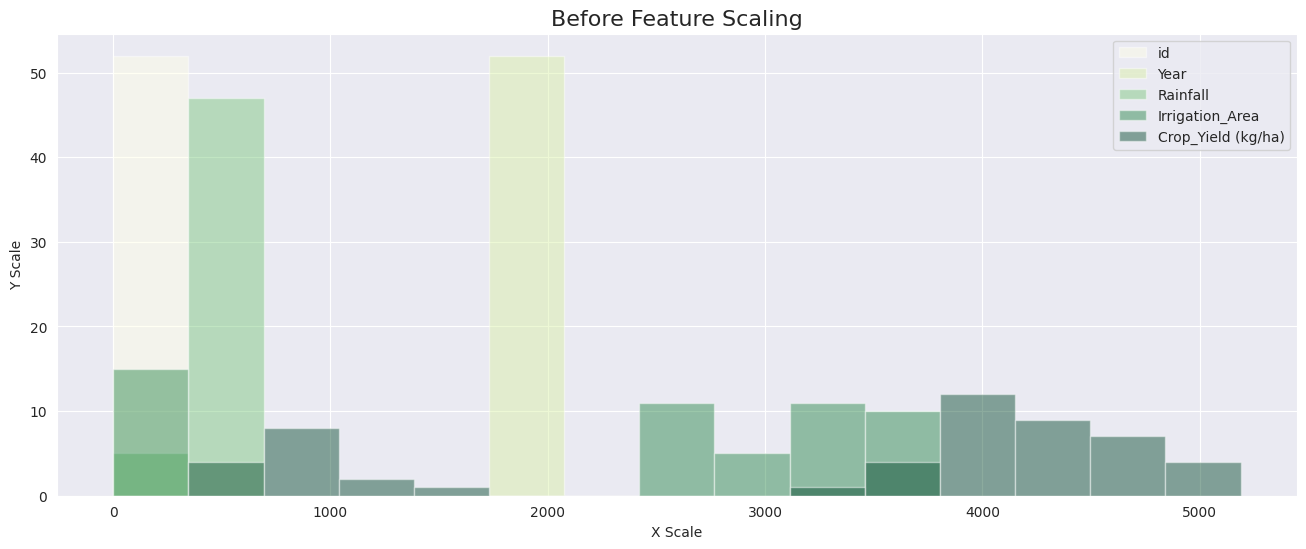

In [57]:
# before processing the training data
train_df.plot(figsize=(16, 6), cmap="YlGn", kind="hist", alpha=0.45, bins=15)
plt.title("Before Feature Scaling", fontsize=16)
plt.xlabel("X Scale")
plt.ylabel("Y Scale")

plt.show()

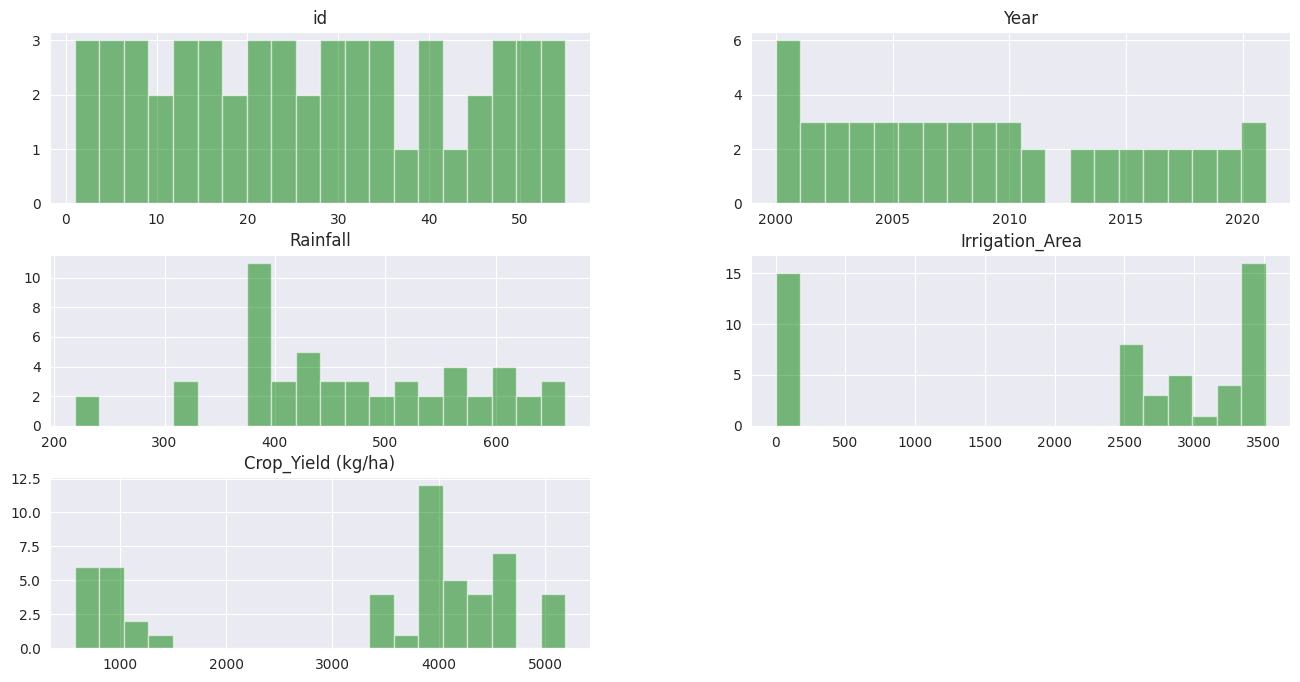

In [58]:
# before processing the training data
train_df.hist(figsize=(16, 8), bins=20, color="Green", alpha=0.5)
plt.show()

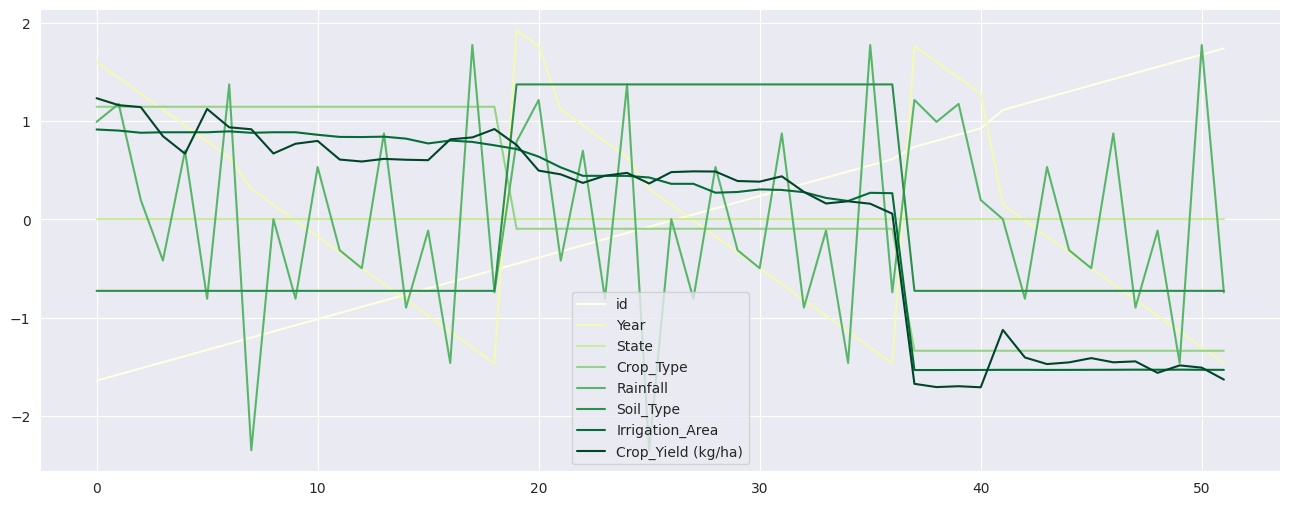

In [59]:
# after processing the training data
train_cp_df.plot(cmap="YlGn", figsize=(16, 6))
plt.show()

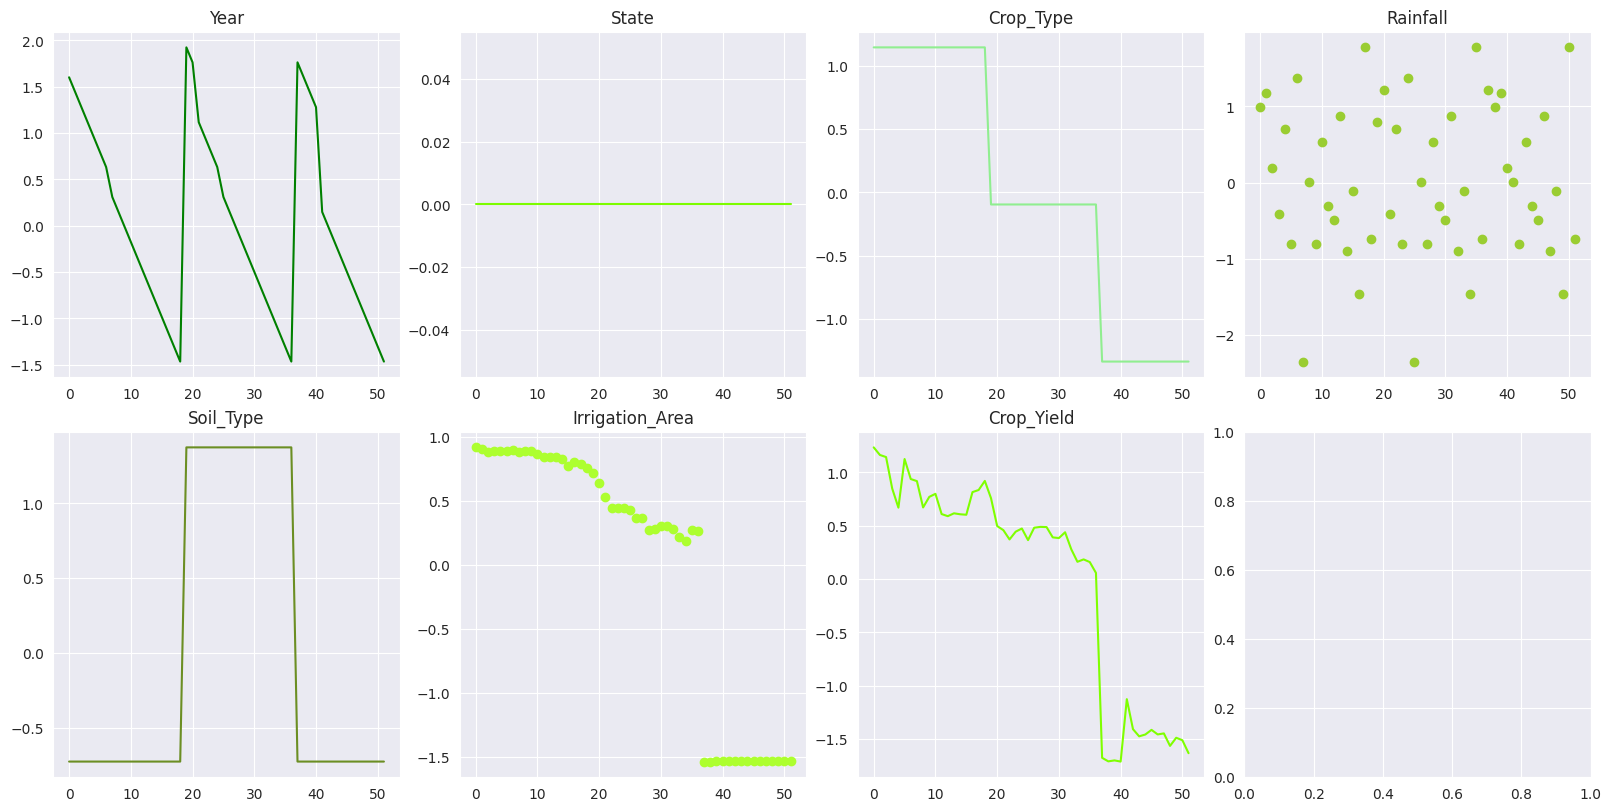

In [60]:
# before processing the training data
fig, axs = plt.subplots(2, 4, layout="constrained", figsize=(16, 8))

ax = axs[0][0]
ax.plot(train_cp_df.index, train_cp_df["Year"], color="g")
ax.set_title("Year")

ax = axs[0, 1]
ax.plot(train_cp_df["State"], color="lawngreen")
ax.set_title("State")

ax = axs[0, 2]
ax.plot(train_cp_df["Crop_Type"], color="lightgreen")
ax.set_title("Crop_Type")

ax = axs[0, 3]
ax.scatter(train_cp_df.index, train_cp_df["Rainfall"], color="yellowgreen")
ax.set_title("Rainfall")

ax = axs[1, 0]
ax.plot(train_cp_df["Soil_Type"], color="olivedrab")
ax.set_title("Soil_Type")

ax = axs[1, 1]
ax.scatter(train_cp_df.index, train_cp_df["Irrigation_Area"], color="greenyellow")
ax.set_title("Irrigation_Area")

ax = axs[1, 2]
ax.plot(train_cp_df["Crop_Yield (kg/ha)"], color="chartreuse")
ax.set_title("Crop_Yield")

plt.show()

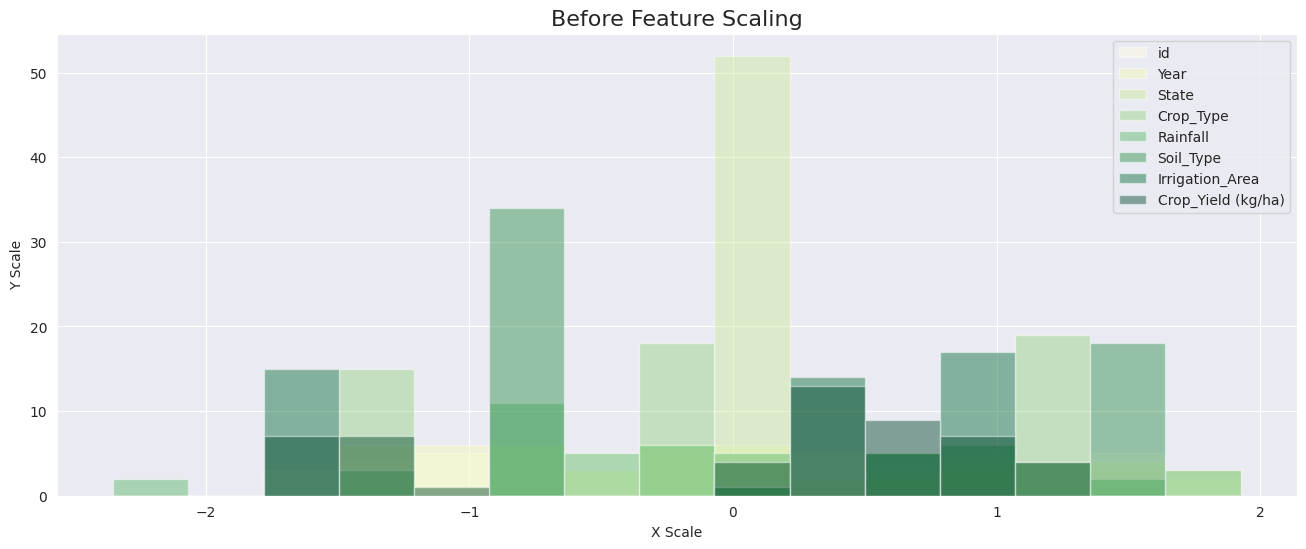

In [61]:
# after processing the training data
train_cp_df.plot(figsize=(16, 6), cmap="YlGn", kind="hist", alpha=0.45, bins=15)
plt.title("Before Feature Scaling", fontsize=16)
plt.xlabel("X Scale")
plt.ylabel("Y Scale")

plt.show()

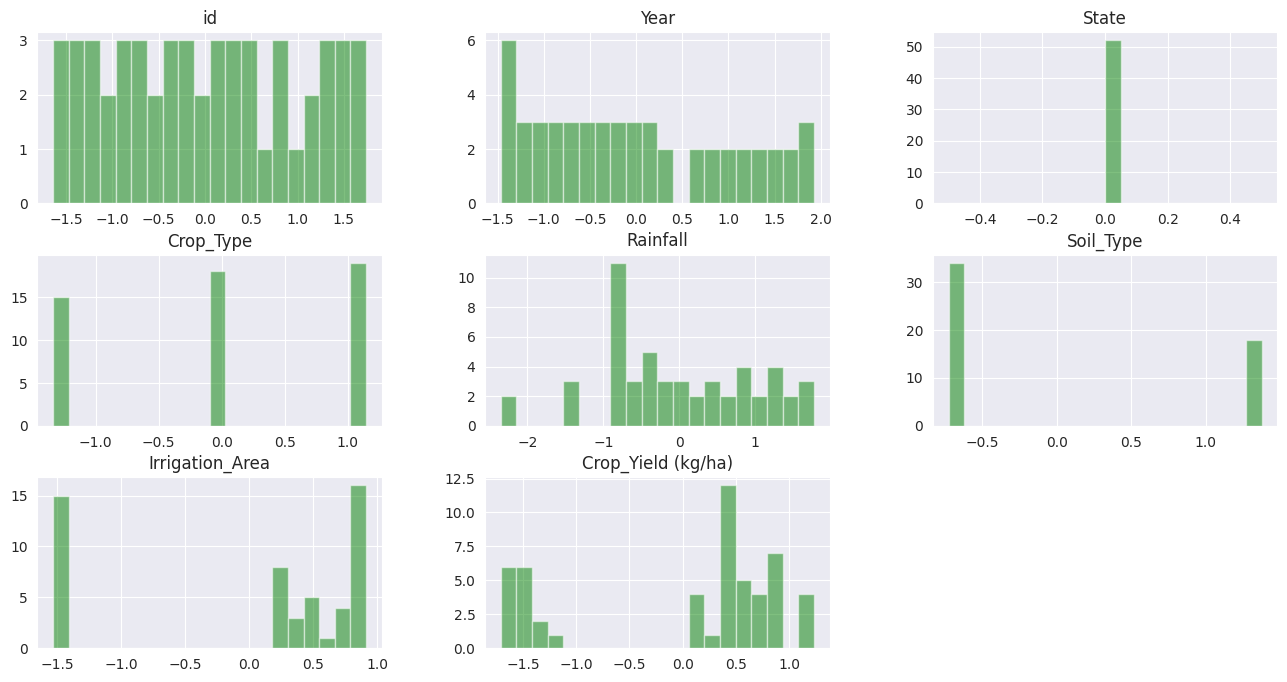

In [62]:
# after processing the training data
train_cp_df.hist(figsize=(16, 8), bins=20, color="Green", alpha=0.5)
plt.show()

# Step 5: Training and Testing ML Model
- We will be using and evaluating different Regression ML models
- Here is the list of models we will be going to use to train our dataset
    - Linear Regression
    - SVM regression
    - KNeighborsRegressor
    - ensemble method's
    - Neural Network's for regression
- But before we move on let's create a pipeline containing 
    - Label Encoder (convert object data to int)
    - Column Transformer (to drop unwanted features)
    - Standard Scalar (for Normalize)
    - Machine Learning Model for regression
- For **Testing** and **Evaluating** ML model we will be using
    - Mean Squared Error
    - R2 Score

In [63]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, r2_score

- Let's create a function for scoring the models 

In [64]:
import numpy as np
np.random.seed(42)

selected_features = ["Year", "Crop_Type", "Irrigation_Area"]
X_train = train_df[selected_features]
y_train = train_df["Crop_Yield (kg/ha)"]

def make_model(model):
    # Custom transformer for label encoding
    class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
        def __init__(self, column):
            self.column = column
            self.label_encoder = LabelEncoder()
    
        def fit(self, X, y=None):
            self.label_encoder.fit(X[self.column])
            return self
    
        def transform(self, X):
            X = X.copy()
            X[self.column] = self.label_encoder.transform(X[self.column])
            return X
    
        def inverse_transform(self, X):
            X = X.copy()
            X[self.column] = self.label_encoder.inverse_transform(X[self.column])
            return X
    
    pipeline = make_pipeline(
        LabelEncoderTransformer(column='Crop_Type'),  # Custom Label Encoder for Crop_Type
        StandardScaler(),
        model,
    )
    
    pipeline.fit(X_train, y_train)

    

    print("model name:", type(model).__name__)
    
    score = pipeline.score(X_train, y_train)
    print("model score on X_train and y_train dataset:", score)

    y_pred = pipeline.predict(X_train)
    mse_error = mean_squared_error(y_train, y_pred)
    print("mean squared error:", mse_error)

    r2 = r2_score(y_train, y_pred)
    print("r2 score:", r2)

    return {
        "model_name": type(model).__name__, 
        "mean_squared_error": mse_error,
        "r2_score": r2
    }

# Model 1: Linear Regression
- Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between the dependent variable and one or more independent features by fitting a linear equation to observed data.
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">more</a>

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
np.random.seed(42)
linear_model = LinearRegression()
make_model(linear_model)

model name: LinearRegression
model score on X_train and y_train dataset: 0.9766514907189398
mean squared error: 57224.00157773447
r2 score: 0.9766514907189398


{'model_name': 'LinearRegression',
 'mean_squared_error': 57224.00157773447,
 'r2_score': 0.9766514907189398}

- The Linera Regression scored about 97.6%
- The mean squared error is 57224
- The r2 score is 97.6% for Linear Regression

# Model 2: SVM Regression
- Support vector regression (SVR) is a type of support vector machine (SVM) that is used for regression tasks. It tries to find a function that best predicts the continuous output value for a given input value.
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html">more</a>

In [67]:
from sklearn.svm import SVR

In [68]:
np.random.seed(42)
svm_model = SVR()
make_model(svm_model)

model name: SVR
model score on X_train and y_train dataset: -0.19128052470729195
mean squared error: 2919665.568571105
r2 score: -0.19128052470729195


{'model_name': 'SVR',
 'mean_squared_error': 2919665.568571105,
 'r2_score': -0.19128052470729195}

- We can see the SVR performs very badly
- has r2 score of -19.12%

# Model 3: KNeighborsRegressor
- KNN regression is a non-parametric method used for predicting continuous values. The core idea is to predict the target value for a new data point by averaging the target values of the K nearest neighbors in the feature space. The distance between data points is typically measured using Euclidean distance, although other distance metrics can be used.
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor">more</a>

In [69]:
from sklearn.neighbors import KNeighborsRegressor

In [70]:
np.random.seed(42)
knn_model = KNeighborsRegressor()
make_model(knn_model)

model name: KNeighborsRegressor
model score on X_train and y_train dataset: 0.9889611227696518
mean squared error: 27054.777692307685
r2 score: 0.9889611227696518


{'model_name': 'KNeighborsRegressor',
 'mean_squared_error': 27054.777692307685,
 'r2_score': 0.9889611227696518}

- The KNN for regression perform's nice for r2 score but can't reduce the mean_squared_error.

# Model 4: Ensemble Method
- Ensemble learning refers to combining multiple machine learning models to create a stronger overall model. The rationale is that by combining multiple models, the overall performance can be improved compared to using just a single model.
- <a href="https://scikit-learn.org/stable//api/sklearn.ensemble.html">more</a>
- We will be using different ensemble method's for regression problem.
    - <a href="https://scikit-learn.org/stable//modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor">Random Forest Regressor</a> 
    - <a href="https://scikit-learn.org/stable//modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor">VotingRegressor</a>
    - <a href="https://scikit-learn.org/stable//modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor">Bagging Regression</a>
    - <a href="https://scikit-learn.org/stable//modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor">Gradient Boosting Regressor</a>

### Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
rf_model = RandomForestRegressor(random_state=42)
make_model(rf_model)

model name: RandomForestRegressor
model score on X_train and y_train dataset: 0.9978601045225519
mean squared error: 5244.5910230769205
r2 score: 0.9978601045225519


{'model_name': 'RandomForestRegressor',
 'mean_squared_error': 5244.5910230769205,
 'r2_score': 0.9978601045225519}

- The Random Forest Regressor performs well with score and error of
    - r2 Score: 99.7%
    - mean squared error: 5276

### Voting Regressor

In [73]:
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor # also using decision tree for regression 

In [74]:
np.random.seed(42)
ensemble_model_voting = VotingRegressor([("lr", LinearRegression()), ('rf', RandomForestRegressor()), ('knn', KNeighborsRegressor()), ('dc', DecisionTreeRegressor())], n_jobs=-1)
make_model(ensemble_model_voting)

model name: VotingRegressor
model score on X_train and y_train dataset: 0.9950277161598611
mean squared error: 12186.387357237381
r2 score: 0.9950277161598611


{'model_name': 'VotingRegressor',
 'mean_squared_error': 12186.387357237381,
 'r2_score': 0.9950277161598611}

### Bagging Regression

In [75]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor # using decision tree for regression

In [76]:
bagging_model = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, n_jobs=-1, random_state=42)
make_model(bagging_model)

model name: BaggingRegressor
model score on X_train and y_train dataset: 0.9978895426781101
mean squared error: 5172.442131692309
r2 score: 0.9978895426781101


{'model_name': 'BaggingRegressor',
 'mean_squared_error': 5172.442131692309,
 'r2_score': 0.9978895426781101}

### Gradient Boosting Regressor

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
gbr_model = GradientBoostingRegressor(random_state=42)
make_model(gbr_model)

model name: GradientBoostingRegressor
model score on X_train and y_train dataset: 0.9997234677643683
mean squared error: 677.7426728875685
r2 score: 0.9997234677643683


{'model_name': 'GradientBoostingRegressor',
 'mean_squared_error': 677.7426728875685,
 'r2_score': 0.9997234677643683}

- We can see among all the ensemble models the **GradientBoostingRegressor** performs the best and has
    - *mean_squared_error* of 677.7
    - *r2 score* of 99.97%

# Model 5: Neural Network's For Regression
- Neural networks are machine learning models that mimic the complex functions of the human brain. These models consist of interconnected nodes or neurons that process data, learn patterns, and enable tasks such as pattern recognition and decision-making.
- Neural Netwoks can be used for both Classification and Regression problems.
- <a href="https://www.geeksforgeeks.org/neural-networks-a-beginners-guide/">more</a>

## Multi Layer Perceptron for Regression (Scikit-Learn)
- A Multi-Layer Perceptron (MLP) consists of fully connected dense layers that transform input data from one dimension to another. It is called “multi-layer” because it contains an input layer, one or more hidden layers, and an output layer. The purpose of an MLP is to model complex relationships between inputs and outputs, making it a powerful tool for various machine learning tasks.
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor">more</a>

In [79]:
from sklearn.neural_network import MLPRegressor

In [80]:
mlp_model = MLPRegressor(hidden_layer_sizes=[3, 100, 100, 100, 1], activation="relu", solver="lbfgs", learning_rate_init=0.001, random_state=42, max_iter=1000)

make_model(mlp_model)

model name: MLPRegressor
model score on X_train and y_train dataset: 0.9943446193340728
mean squared error: 13860.564212218069
r2 score: 0.9943446193340728


{'model_name': 'MLPRegressor',
 'mean_squared_error': 13860.564212218069,
 'r2_score': 0.9943446193340728}

- Let's see on `train_cp_df`

In [81]:
#MLP
from sklearn.neural_network import MLPRegressor

X = train_cp_df.drop(["Crop_Yield (kg/ha)", "State", "id", "Rainfall", "Soil_Type"], axis=1) 

model = MLPRegressor(hidden_layer_sizes=[3, 100, 100, 100, 1], activation="relu", solver="lbfgs", learning_rate_init=0.001, random_state=42, max_iter=1000)
model.fit(X, y)

MLPRegressor(hidden_layer_sizes=[3, 100, 100, 100, 1], max_iter=1000,
             random_state=42, solver='lbfgs')

In [82]:
model.score(X, y)

0.9908136976543682

In [83]:
y_pred = model.predict(X)

In [84]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y, y_pred)

0.009186302345631812

In [85]:
r2_score(y, y_pred)

0.9908136976543682

## TensorFlow Regression MLP using Sequential API

In [86]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [87]:
tf.random.set_seed(42)

selected_features = ["Year", "Crop_Type", "Irrigation_Area"]
X = train_df[selected_features]
y = train_df["Crop_Yield (kg/ha)"]


label_encoder = LabelEncoder()

# Encoding labels in columns
X["Crop_Type"] = label_encoder.fit_transform(X["Crop_Type"])
# X["Soil_Type"] = label_encoder.fit_transform(X["Soil_Type"])

X = np.array(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

<ipython-input-87-5d46743bcad7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Crop_Type"] = label_encoder.fit_transform(X["Crop_Type"])


In [88]:
X_train.shape

(41, 3)

In [89]:
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization()
tf_model = tf.keras.Sequential([
    tf.keras.layers.Input(X_train.shape[1:]),
    norm_layer,
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1000, activation="relu"),
    # tf.keras.layers.Dense(1000, activation="relu"),
    # # tf.keras.layers.Dense(5000, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [90]:
tf_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 3)                   │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │         101,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           1,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,103,408 (4.21 MB)

 Trainable params: 1,103,401 (4.21 MB)

 Non-trainable params: 7 (32.00 B)

In [91]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

tf_model.compile(loss="mse", optimizer=optimizer, metrics=["R2Score"])

In [92]:
# X_train_array = np.array(X_train)
norm_layer.adapt(X_train)

In [93]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",
                                        patience=5,
                                        restore_best_weights=True)

history = tf_model.fit(X_train, y_train, epochs=50000, validation_data=(X_val, y_val), verbose=0, callbacks=[earlystopping])

In [94]:
mse_train, r2_train = tf_model.evaluate(X_train, y_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - R2Score: 0.1916 - loss: 1908213.5000


In [95]:
mse_train, r2_train = tf_model.evaluate(X_val, y_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - R2Score: 0.6372 - loss: 957070.0000


In [96]:
X_val[:3]

array([[2.0210e+03, 1.0000e+00, 3.2295e+03],
       [2.0100e+03, 0.0000e+00, 4.9000e+00],
       [2.0040e+03, 0.0000e+00, 7.2000e+00]])

In [97]:
y_val[:3]

19    4443
44    1495
50     993
Name: Crop_Yield (kg/ha), dtype: int64

In [98]:
y_pred = tf_model.predict(X_val[:3])
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


array([[3028.9622],
       [1779.258 ],
       [2111.9329]], dtype=float32)

In [99]:
mean_squared_error(y_val[:3], y_pred)

1110772.1363195379

- Final Neural Network Model for Regression considering all the training data

In [100]:
# Final Neural Network Model for Regression considering all the training data

tf.random.set_seed(42)

selected_features = ["Year", "Crop_Type", "Irrigation_Area"]
X_train = train_df[selected_features]
y_train = train_df["Crop_Yield (kg/ha)"]


label_encoder = LabelEncoder()

# Encoding labels in columns
X_train["Crop_Type"] = label_encoder.fit_transform(X_train["Crop_Type"])

X_train = np.array(X_train)

<ipython-input-100-31b28ff28eae>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Crop_Type"] = label_encoder.fit_transform(X_train["Crop_Type"])


In [101]:
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization()
nn_model = tf.keras.Sequential([
    tf.keras.layers.Input(X_train.shape[1:]),
    norm_layer,
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [102]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

nn_model.compile(loss="mse", optimizer=optimizer, metrics=["R2Score"])

# X_train_array = np.array(X_train)
norm_layer.adapt(X_train)

In [103]:
%%time
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",
                                        patience=300,
                                        restore_best_weights=True)

history = nn_model.fit(X_train, y_train, epochs=50000, validation_data=(X_val, y_val), verbose=0, callbacks=[earlystopping])

CPU times: user 3min 57s, sys: 27.5 s, total: 4min 24s
Wall time: 4min 8s


In [104]:
nn_model.evaluate(X_train, y_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - R2Score: 0.9934 - loss: 2322.1118


[2124.621337890625, 0.9991331100463867]

# Step 7: Deployment
- In this step we will be predicting the test dataset on trained model
- after predicting the test data column we will save the prediction as csv file.


In [105]:
test_df

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area
0,1001,2021,Punjab,Wheat,556.9,Loamy,3500.70
1,1002,2020,Punjab,Wheat,602.6,Loamy,3509.50
2,1003,2019,Punjab,Rice,578.6,alluvial,3091.80
3,1004,2018,Punjab,Rice,598.3,alluvial,3057.90
4,1005,2017,Punjab,Rice,493.0,alluvial,3033.00
5,1006,2014,Punjab,Bajra,384.9,Loamy,1.20
6,1007,2013,Punjab,Bajra,619.7,Loamy,3.81
7,1008,2011,Punjab,Bajra,218.9,Loamy,2.50


- we wan't to predict the `Crop Yield (kg/ha)` column
- But first let's drop the columns which we don't need for prediction
- applying Label encoder
- Standard Scalling the data
- and then convert the dataset into numpy array.

In [107]:
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [116]:
np.random.seed(42)

selected_features = ["Year", "Crop_Type", "Irrigation_Area"]

X_test = test_df[selected_features]

label_encoder = LabelEncoder()

# Encoding labels in columns
X_test["Crop_Type"] = label_encoder.fit_transform(X_test["Crop_Type"])

scaler = StandardScaler()

X_test_new = scaler.fit_transform(X_test)

X_test_new

<ipython-input-116-21cd8b2484a4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Crop_Type"] = label_encoder.fit_transform(X_test["Crop_Type"])


array([[ 1.30527975,  1.44115338,  0.93623788],
       [ 1.00693009,  1.44115338,  0.94182111],
       [ 0.70858043,  0.16012815,  0.6768078 ],
       [ 0.41023078,  0.16012815,  0.65529966],
       [ 0.11188112,  0.16012815,  0.63950164],
       [-0.78316785, -1.12089708, -1.28404961],
       [-1.0815175 , -1.12089708, -1.28239367],
       [-1.67821682, -1.12089708, -1.28322481]])

- Let's create a function `make_test_data` to prepare our test dataset

In [117]:
import numpy as np
np.random.seed(42)

selected_features = ["Year", "Crop_Type", "Irrigation_Area"]
X_test = test_df[selected_features]

def make_test_data(X_data):
    # Custom transformer for label encoding
    class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
        def __init__(self, column):
            self.column = column
            self.label_encoder = LabelEncoder()
    
        def fit(self, X, y=None):
            self.label_encoder.fit(X[self.column])
            return self
    
        def transform(self, X):
            X = X.copy()
            X[self.column] = self.label_encoder.transform(X[self.column])
            return X
    
        def inverse_transform(self, X):
            X = X.copy()
            X[self.column] = self.label_encoder.inverse_transform(X[self.column])
            return X
    
    pipeline = make_pipeline(
        LabelEncoderTransformer(column='Crop_Type'),  # Custom Label Encoder for Crop_Type
        StandardScaler()
    )
    
    return pipeline.fit_transform(X_data)

X_test_new = make_test_data(X_test)

In [118]:
X_test_new

array([[ 1.30527975,  1.44115338,  0.93623788],
       [ 1.00693009,  1.44115338,  0.94182111],
       [ 0.70858043,  0.16012815,  0.6768078 ],
       [ 0.41023078,  0.16012815,  0.65529966],
       [ 0.11188112,  0.16012815,  0.63950164],
       [-0.78316785, -1.12089708, -1.28404961],
       [-1.0815175 , -1.12089708, -1.28239367],
       [-1.67821682, -1.12089708, -1.28322481]])

### Let's Predict
We will predict the test dataset using these models
- Model 1: Gradient Boost Regression Model (`gbr_model`)
- Model 2: Tensor Flow Neural Net Model (`nn_model`) **Note:** *For this model we dont want to use the `make_test_data` function instead it will be carried out by the model and we just need to select the requred columns.*
- Model 3: Bagging Model (`bagging_model`)
- Model 4: Random Forest Regressor (`rf_model`)
- Model 5: Votting Regressor (`ensemble_model_voting`)
- Model 6: MLP Regression Sklearn (`mlp_model`)

In [144]:
gbr_predict = gbr_model.predict(X_test_new)
gbr_predict

array([5201.7110361 , 4629.61156374, 4065.14834939, 3975.26831813,
       4028.79012711, 1026.96813948,  929.63060717,  875.11013923])

In [151]:
test_df_cp = test_df.copy()
test_df_cp["Crop_Yield (kg/ha)"] = gbr_predict
test_df_cp

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1001,2021,Punjab,Wheat,556.9,Loamy,3500.70,5201.711036
1,1002,2020,Punjab,Wheat,602.6,Loamy,3509.50,4629.611564
2,1003,2019,Punjab,Rice,578.6,alluvial,3091.80,4065.148349
3,1004,2018,Punjab,Rice,598.3,alluvial,3057.90,3975.268318
4,1005,2017,Punjab,Rice,493.0,alluvial,3033.00,4028.790127
5,1006,2014,Punjab,Bajra,384.9,Loamy,1.20,1026.968139
6,1007,2013,Punjab,Bajra,619.7,Loamy,3.81,929.630607
7,1008,2011,Punjab,Bajra,218.9,Loamy,2.50,875.110139


In [140]:
tf.random.set_seed(42)

selected_features = ["Year", "Crop_Type", "Irrigation_Area"]
X_test_tf = test_df[selected_features]


label_encoder = LabelEncoder()

# Encoding labels in columns
X_test_tf["Crop_Type"] = label_encoder.fit_transform(X_test_tf["Crop_Type"])

X_test_tf = np.array(X_test_tf)
X_test_tf

<ipython-input-140-12e1038dc736>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_tf["Crop_Type"] = label_encoder.fit_transform(X_test_tf["Crop_Type"])


array([[2.0210e+03, 2.0000e+00, 3.5007e+03],
       [2.0200e+03, 2.0000e+00, 3.5095e+03],
       [2.0190e+03, 1.0000e+00, 3.0918e+03],
       [2.0180e+03, 1.0000e+00, 3.0579e+03],
       [2.0170e+03, 1.0000e+00, 3.0330e+03],
       [2.0140e+03, 0.0000e+00, 1.2000e+00],
       [2.0130e+03, 0.0000e+00, 3.8100e+00],
       [2.0110e+03, 0.0000e+00, 2.5000e+00]])

In [142]:
nn_model.predict(X_test_tf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


array([[5549.8433 ],
       [5411.741  ],
       [3979.1973 ],
       [3981.6597 ],
       [4025.8696 ],
       [ 805.70526],
       [1044.9347 ],
       [1520.5034 ]], dtype=float32)

In [133]:
bagging_model.predict(X_test_new)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


array([5074.458, 4771.216, 4159.786, 4131.378, 4082.952,  969.372,
        902.488,  848.178])

In [134]:
rf_model.predict(X_test_new)

array([5058.36, 4751.27, 4195.6 , 4163.91, 4115.2 ,  969.29,  902.26,
        837.71])

In [135]:
ensemble_model_voting.predict(X_test_new)

array([4935.43237886, 4842.3318781 , 4110.36118476, 4065.26411327,
       4095.49737285, 1043.67887027,  989.34814181,  974.80644469])

In [136]:
mlp_model.predict(X_test_new)

array([5381.49113583, 5290.88556202, 4031.57045189, 4044.90588841,
       4059.06003727, 1828.86281362, 1705.63245676, 1517.07250628])